    
<h1 style="text-align: center; color: purple;">Econ 220 Python Lab: Data Visualization </h1>

<h2 style="text-align: center; color: #012169" markdown="1">Handout #5</h2>


### Table of Contents  
* [Data Visualization using Matplotlib and Seaborn](#anchor1)
* [ScatterPlot with Seaborn](#anchor2)
* [Telling a Story](#anchor3)
* [Bar or Column Graphs](#anchor4)

# Data Visualization using Matplotlib and Seaborn <a class = anchor id = anchor1></a>

Data visualization is a very important part of Data analysis. Remember the saying **"An image is worth more than 1000 words"** that is what a graph can do for you in a report, a presentation, or a research article.

We will focus on two Python packages for Data Visualization. **`Matplotlib and Seaborn`**, especially the later. 

**Seaborn** is a library for making statistical graphics in Python. It is built on top of matplotlib and closely integrated with pandas data structures. It provides a high-level interface for drawing attractive and informative statistical graphics. Explore the documentation for this package [here](https://seaborn.pydata.org/)

#### The Package Setup 



1. We import matplotlib and seaborn and the other necessary packages

In [1]:
# Import necessary packages here
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

2. We apply the default default seaborn theme, scaling, and color palette. This is not always necesary.

In [2]:
sns.set()

3. We load the datasets that we are going to use for our visualizations and explore it a little to see the names and types of the variables

In [3]:
# Read CSV file into a DataFrame this data comes from the web 
# http://672258.youcanlearnit.net/college.csv
collegedata = pd.read_csv('http://672258.youcanlearnit.net/college.csv')

collegedata.info()
# Display DataFrame
collegedata.describe().round()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1269 entries, 0 to 1268
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  1269 non-null   int64  
 1   name                1269 non-null   object 
 2   city                1269 non-null   object 
 3   state               1269 non-null   object 
 4   region              1269 non-null   object 
 5   highest_degree      1269 non-null   object 
 6   control             1269 non-null   object 
 7   gender              1269 non-null   object 
 8   admission_rate      1269 non-null   float64
 9   sat_avg             1269 non-null   int64  
 10  undergrads          1269 non-null   int64  
 11  tuition             1269 non-null   int64  
 12  faculty_salary_avg  1269 non-null   int64  
 13  loan_default_rate   1267 non-null   float64
 14  median_debt         1269 non-null   float64
 15  lon                 1269 non-null   float64
 16  lat   

,id,admission_rate,sat_avg,undergrads,tuition,faculty_salary_avg,loan_default_rate,median_debt,lon,lat
count,1269.0,1269.0,1269.0,1269.0,1269.0,1269.0,1267.0,1269.0,1269.0,1269.0
mean,186988.0,1.0,1060.0,5629.0,21025.0,7656.0,0.0,23483.0,-88.0,39.0
std,52840.0,0.0,133.0,7380.0,12546.0,2223.0,0.0,4614.0,14.0,5.0
min,100654.0,0.0,720.0,47.0,2732.0,1451.0,0.0,6056.0,-158.0,20.0
25%,153250.0,1.0,973.0,1296.0,8970.0,6191.0,0.0,21250.0,-94.0,35.0
50%,186283.0,1.0,1040.0,2556.0,20000.0,7272.0,0.0,24588.0,-85.0,40.0
75%,215284.0,1.0,1120.0,6715.0,30364.0,8671.0,0.0,27000.0,-79.0,42.0
max,484905.0,1.0,1545.0,52280.0,51008.0,20650.0,0.0,41000.0,-69.0,61.0


4. Choose the info you want to visualize and the type of graph you will use for that purpose

##  A scatter plot `sns.scatterplot()`: <a class = anchor id = anchor2></a>

A scatter plot a graph where the values of two variables are plotted along two axes, the pattern of the resulting points revealing any correlation present.

Let's start by looking at the relationship between tuition and SAT using a scatterplot. 

There are many things that you can add and modify in a simple scatter plot to make it more visually appealing or to incorporate more information into it. 

The documentation with the description for all the arguments for the scatter plot in seaborn can be found [here](https://seaborn.pydata.org/generated/seaborn.scatterplot.html?highlight=scatterplot#seaborn.scatterplot)

The simplest one has the arguments` x = "tuition", y = "sat_avg", and the data=collegedata.`

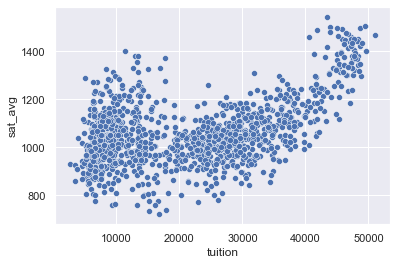

In [4]:
# Plot using Seaborn
sns.set(color_codes=True)
sns.scatterplot(x="tuition",y="sat_avg",data=collegedata);
# the ; (semi-colon) removes the outtext generated after a graph, 
#try runing the same without it and see how the output is 

> You can modify things aestetically; the transparency using alpha, the color of the dots using color, and the markers using marker = "+" for example

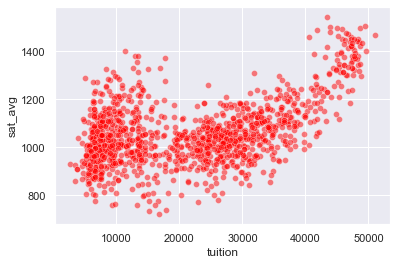

In [5]:

sns.scatterplot(x="tuition",
                y="sat_avg",
                alpha = 0.5,
                color = "red",
                data=collegedata);

Is there anything you can see in the pattern here?

What change would you make to incorporate that simple information in the graph?

Yes! Let's try to incorporate the difference between public and private universities here. 

Using colors to incorporate this information is the way to go at first. 
The argument for this isn seaborn is:

> **hue** = vector or key in data
It represents a grouping variable that will produce points with different colors. Can be either categorical or numeric, although color mapping will behave differently in latter case. (Taken from seaborn documentation)

To add or change the title of your graph and the labels on the axis. 
<br>
Use *`.set(title = "Title", 
          xlabel = "Label for x", 
          ylabel = "Label for x")`*
          
          
          

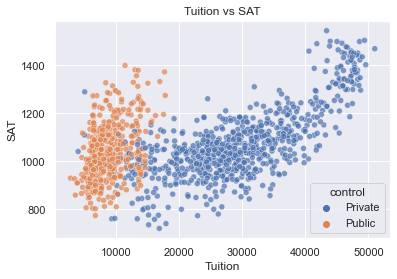

In [7]:
sns.scatterplot(x="tuition", 
                y="sat_avg", 
                hue="control", 
                alpha=0.7, 
                data=collegedata).set(title="Tuition vs SAT",
                                     xlabel = "Tuition",
                                     ylabel="SAT");

> There are a couple of changes we can make to have the same info but looking better. Use ` relplot() or lmplot()` to divide the graphs into one for each group (in two columns). You will be using this function a lot here and in ECON320. So better start early.

* **col** ="control" adds the facet that divides the graphs by public and private university
* **facet_kws** = {'sharey': True, 'sharex': False} In you want to adjusts the axis to the data points 
* **scatter_kws** = {'alpha':0.3} defines aesthetic features of the scatter in this case transparency alpha
* **fit_reg* = False we will keep this option like this, it excludes the line that shows the direccion of the relationship between the variables. This will be different if you want to see the regression line (Econometrics)

Go to these links for more on [`lmplot()`](https://seaborn.pydata.org/generated/seaborn.lmplot.html)
[`relplot()`](https://seaborn.pydata.org/generated/seaborn.relplot.html)

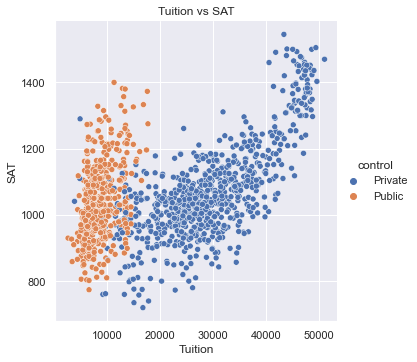

In [8]:
# the same graph as with scatterplot
sns.relplot(x="tuition", 
            y="sat_avg", 
            hue="control",  
            data=collegedata).set(title ="Tuition vs SAT", 
                                      xlabel = "Tuition", 
                                      ylabel =  "SAT");

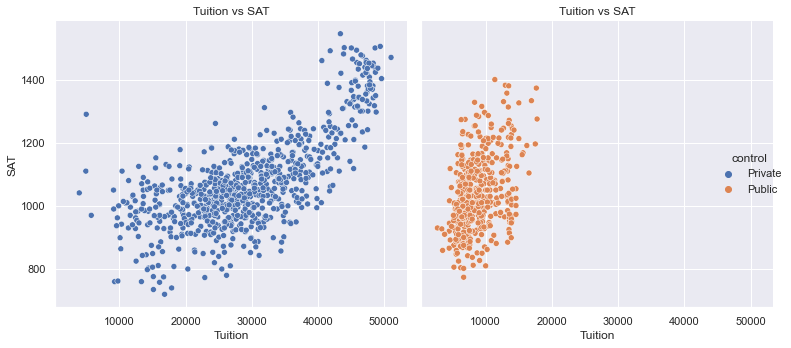

In [9]:
# Now separating this in two graphs
sns.relplot(x="tuition", 
            y="sat_avg", 
            hue="control",
            col="control" ,
            data=collegedata).set(title ="Tuition vs SAT", 
                                      xlabel = "Tuition", 
                                      ylabel =  "SAT").add_legend();

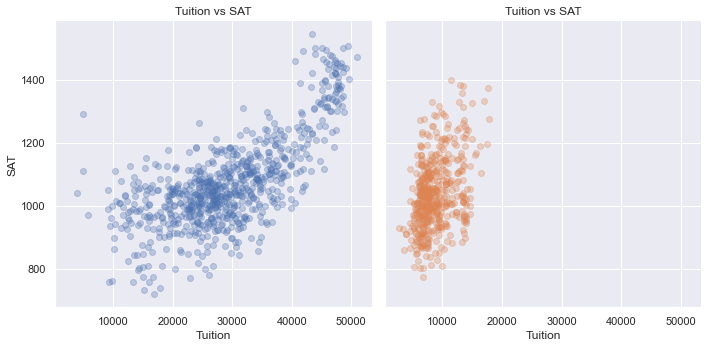

In [10]:
sns.lmplot(x ="tuition",
           y="sat_avg",
           hue="control",
           col="control",
           scatter_kws = {"alpha":0.3},
           fit_reg = False,
           data=collegedata).set(title ="Tuition vs SAT", 
                                      xlabel = "Tuition", 
                                      ylabel =  "SAT");

/Users/gavinmason/opt/anaconda3/lib/python3.9/site-packages/seaborn/regression.py:592: UserWarning: sharex is deprecated from the `lmplot` function signature. Please update your code to pass it using `facet_kws`.
  warnings.warn(msg, UserWarning)
/Users/gavinmason/opt/anaconda3/lib/python3.9/site-packages/seaborn/regression.py:592: UserWarning: sharey is deprecated from the `lmplot` function signature. Please update your code to pass it using `facet_kws`.
  warnings.warn(msg, UserWarning)


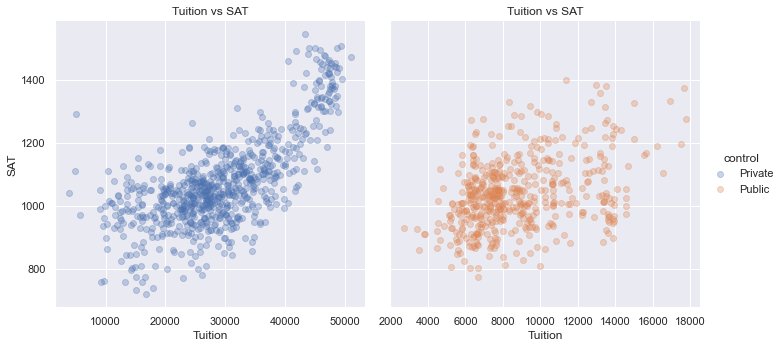

In [12]:
sns.lmplot(x="tuition",
           y="sat_avg",
           hue = "control",
           col = "control",
           scatter_kws = {"alpha":0.3},
           sharey= True, 
           sharex= False,
           fit_reg = False,
           data=collegedata).set(title ="Tuition vs SAT", 
                                      xlabel = "Tuition", 
                                      ylabel =  "SAT").add_legend();

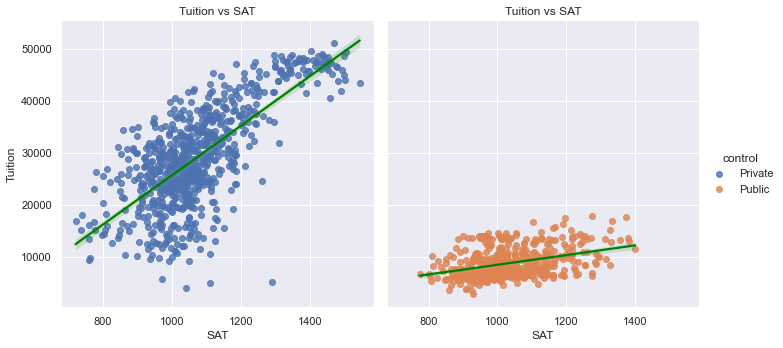

In [17]:
    
sns.lmplot(y="tuition", x="sat_avg", hue="control", col="control",
           line_kws={"color":"green"},
           data=collegedata).set(title ="Tuition vs SAT", 
                                      ylabel = "Tuition", 
                                      xlabel =  "SAT").add_legend();

/Users/gavinmason/opt/anaconda3/lib/python3.9/site-packages/seaborn/regression.py:592: UserWarning: sharex is deprecated from the `lmplot` function signature. Please update your code to pass it using `facet_kws`.
  warnings.warn(msg, UserWarning)
/Users/gavinmason/opt/anaconda3/lib/python3.9/site-packages/seaborn/regression.py:592: UserWarning: sharey is deprecated from the `lmplot` function signature. Please update your code to pass it using `facet_kws`.
  warnings.warn(msg, UserWarning)


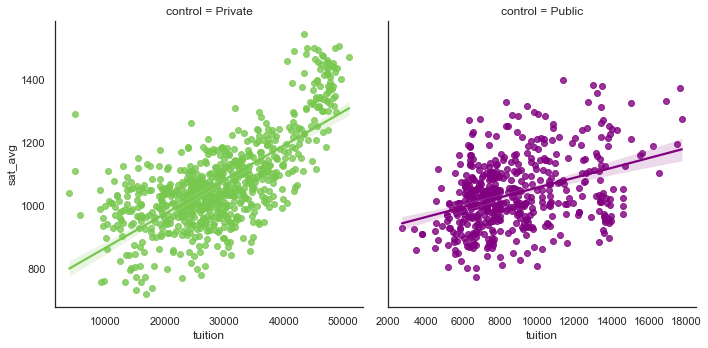

In [18]:
# seaborn themes: darkgrid, whitegrid, dark, white, and ticks.
# Set theme
sns.set_style('white')
control_type_colors = ['#78C850',  # Grass
                       'purple',  # Fire 
                    ] # Set color palette
g = sns.lmplot(x="tuition", y="sat_avg", hue="control", col="control", 
               sharey= True, sharex= False,
               palette = control_type_colors, 
               data=collegedata)# Change color palette
axes = g.axes.flatten()


# Telling a Story: <a class = anchor id = anchor3 ></a>

Your data analysis and especialy your data visualizations should tell a story that complement your graphs with a few tables that introduce descriptive stats about what is going on in the dataset!

Or sometimes you just need to create a new table with stats form your data to put this information in a graph that tells a story about what is going on in the data. 

In [23]:
group_agg = collegedata.groupby("control")[["sat_avg","tuition"]].agg(["mean","std"]).round(2)
group_agg.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2 entries, Private to Public
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   (sat_avg, mean)  2 non-null      float64
 1   (sat_avg, std)   2 non-null      float64
 2   (tuition, mean)  2 non-null      float64
 3   (tuition, std)   2 non-null      float64
dtypes: float64(4)
memory usage: 80.0+ bytes


In [24]:
group_agg.columns = ['_'.join(gp) for gp in group_agg.columns.values]
group_agg

,sat_avg_mean,sat_avg_std,tuition_mean,tuition_std
control,,,,
Private,1073.24,144.03,29147.63,9555.55
Public,1038.80,111.45,8776.37,2726.31


In [25]:
collegedata.groupby('control')[['sat_avg', 'tuition']].corr()

sat_avg   tuition
control                            
Private sat_avg  1.000000  0.716002
        tuition  0.716002  1.000000
Public  sat_avg  1.000000  0.381372
        tuition  0.381372  1.000000

> Pivot table is another way of creating a table of statistics

In [26]:
sat_control = collegedata.pivot_table(values=["sat_avg", "tuition"], 
                                      index="control", 
                                      aggfunc=[np.mean, np.median])
# the control variable becomes the index but you want it to be a variable so you can use it later,
# in a graph for example.
sat_control.reset_index(inplace=True)
sat_control.columns = list(map("_".join, sat_control.columns))

sat_control
# there is an extra level in the variable name including the sat_avg this is not a problem here. 


,control_,mean_sat_avg,mean_tuition,median_sat_avg,median_tuition
0,Private,1073.238532,29147.629096,1050,28456.0
1,Public,1038.804348,8776.373518,1029,7960.5


In [27]:
sat_control.info()
sat_control

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   control_        2 non-null      object 
 1   mean_sat_avg    2 non-null      float64
 2   mean_tuition    2 non-null      float64
 3   median_sat_avg  2 non-null      int64  
 4   median_tuition  2 non-null      float64
dtypes: float64(3), int64(1), object(1)
memory usage: 208.0+ bytes


,control_,mean_sat_avg,mean_tuition,median_sat_avg,median_tuition
0,Private,1073.238532,29147.629096,1050,28456.0
1,Public,1038.804348,8776.373518,1029,7960.5


#  Bar or Column Graphs <a class = anchor id = anchor4 ></a>

You can use a bar or column graph to make comparisons between averages or values among groups in your data. It allows you to see the patterns or results that you had in tables. 
> you can use `plot` from `matplotlib` and specify the kind of graph is a bar. See below:

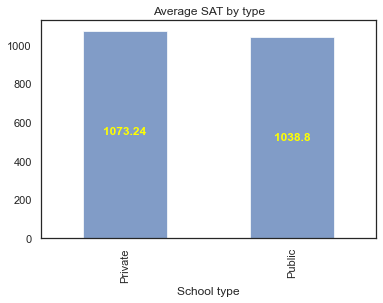

In [30]:
ax = sat_control.plot(x = "control_",
                      y="mean_sat_avg",
                      kind="bar",
                      alpha=0.7,
                      title = "Average SAT by type",
                      xlabel = "School type",
                      legend = None)
for p in ax.patches: ax.annotate(np.round(p.get_height(),decimals=2), 
                                 (p.get_x()+p.get_width()/2., p.get_height()),
                                 ha='center', 
                                 va='center', 
                                 xytext=(0, -100), 
                                 textcoords='offset points',
                                 color='yellow', fontweight='bold' )
#plt.xticks(rotation=360)
plt.show;

> `sns.barplot` plots a bar graph with the average value of the y variable for each category. The method annotate allows you to add the values you need to define the position


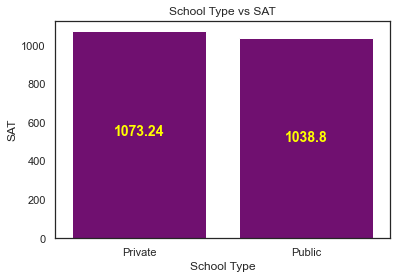

In [31]:
ax=sns.barplot(x="control", y="sat_avg",
               palette=['purple'], ci=None,
               data=collegedata)

for p in ax.patches: ax.annotate(np.round(p.get_height(),decimals=2), 
                                  (p.get_x()+p.get_width()/2., p.get_height()),
                                   ha='center', va='center', xytext=(0, -100), 
                                   textcoords='offset points',color='yellow', fontweight='bold', fontsize=14 )
ax.set(title ="School Type vs SAT", 
        xlabel = "School Type", 
        ylabel =  "SAT")
#plt.show;

ax;

> We can do other graphs and group more levels, for example average tuition by region and school. 

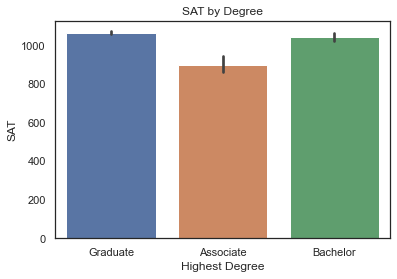

In [32]:
ax =sns.barplot(x="highest_degree", 
                y="sat_avg", 
                data=collegedata).set(title ="SAT by Degree", 
                                      xlabel = "Highest Degree", 
                                      ylabel =  "SAT")
ax;

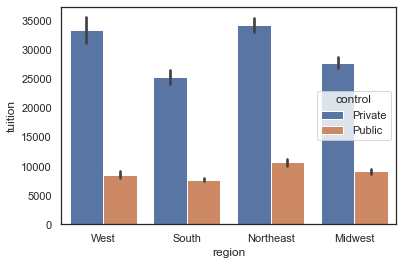

In [33]:
ax =sns.barplot(x="region", 
                y="tuition", 
                hue="control", data=collegedata)
ax;


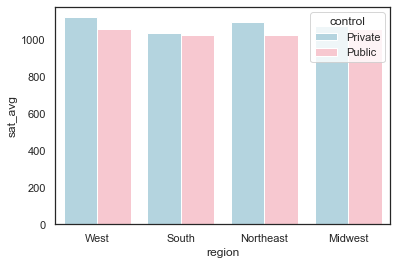

In [34]:
ax =sns.barplot(x="region", 
                y="sat_avg", 
                hue="control", 
                palette=['lightblue', 'pink'], 
                ci=None, data=collegedata)
ax;

In [36]:
dat = collegedata.groupby(["region","control"])["tuition"].mean().unstack("control")
dat.round(2)

control,Private,Public
region,,
Midwest,27765.22,9124.07
Northeast,34317.95,10660.30
South,25297.02,7653.22
West,33369.78,8549.66


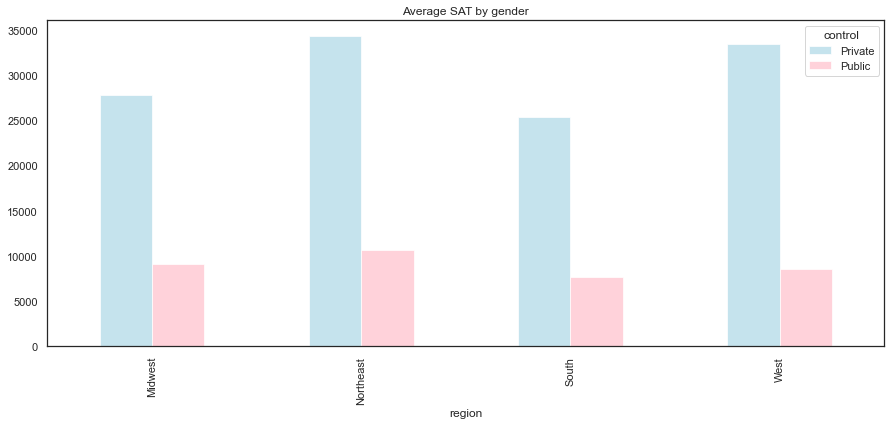

In [38]:
dat.plot.bar(stacked= False , 
             title="Average SAT by gender", 
             color= ['lightblue', 'pink'], 
             alpha=0.7, figsize=(15,6));

&nbsp;
<hr />
<p style="font-family:palatino; text-align: center;font-size: 15px">ECON220 Python Programming Laboratory</a></p>
<p style="font-family:palatino; text-align: center;font-size: 15px">Professor <em> Paloma Lopez de mesa Moyano</em></a></p>
<p style="font-family:palatino; text-align: center;font-size: 15px"><span style="color: #6666FF;"><em>paloma.moyano@emory.edu</em></span></p>

<p style="font-family:palatino; text-align: center;font-size: 15px">Department of Economics</a></p>
<p style="font-family:palatino; text-align: center; color: #012169;font-size: 15px">Emory University</a></p>

&nbsp;